# Cervical Cancer Risk Factors Analysis

## Step 1: Data Cleaning

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load the data
data = pd.read_csv("C:/Users/Shivam/Downloads/cervical+cancer+risk+factors/risk_factors_cervical_cancer.csv")

# Data Cleaning
data.replace('?', pd.NA, inplace=True)
cols_to_numeric = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
    'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
    'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'
]
for col in cols_to_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Ensure there are no NAType values remaining
data.fillna(0, inplace=True)

## Step 2: Exploratory Data Analysis (EDA)

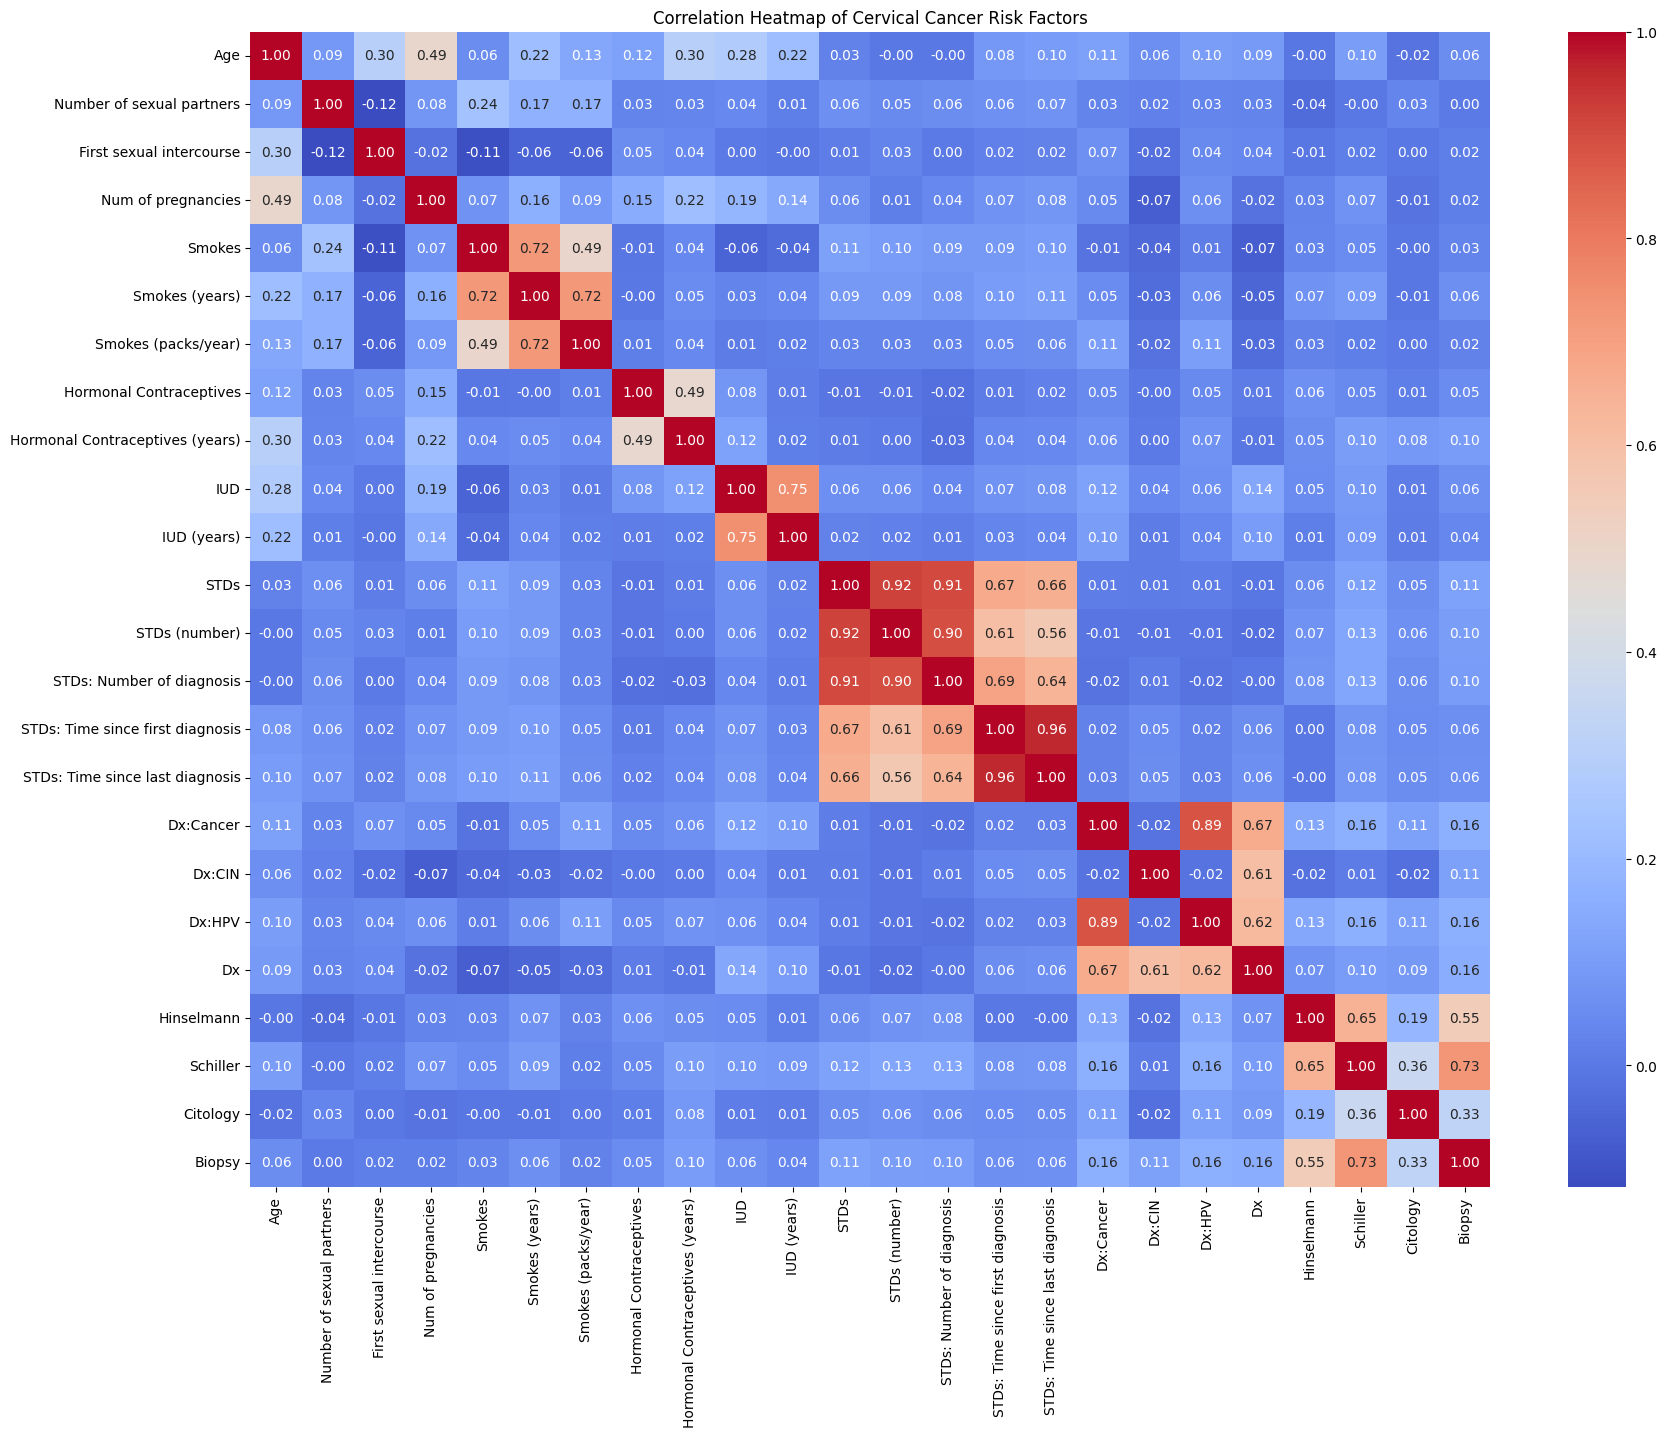

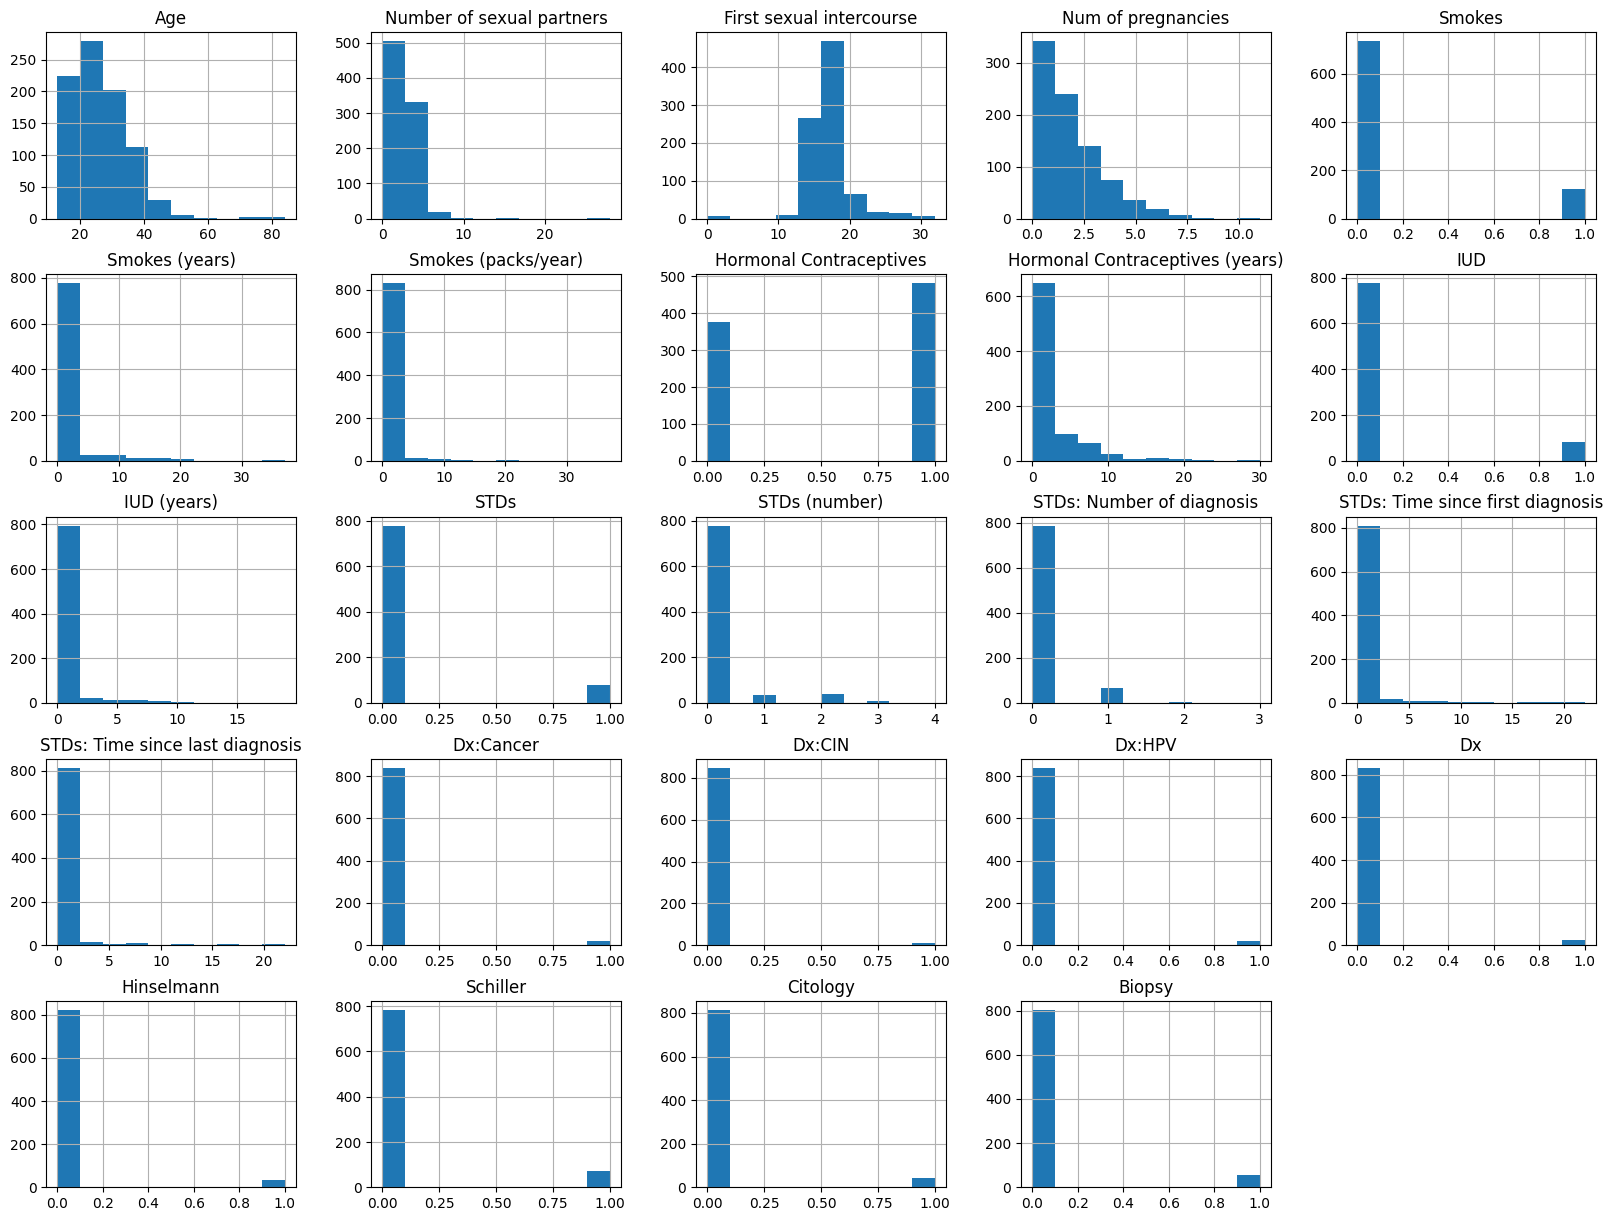

In [8]:
# EDA
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Cervical Cancer Risk Factors')
plt.show()

# Distribution of each feature
data.hist(figsize=(20, 15))
plt.show()

## Step 3: Specific Analysis - Logistic Regression

In [9]:
# Specific Analysis
target = 'Biopsy'
features = data.drop(columns=[target]).columns
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=42)

# Logistic Regression with Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10, 100]}
model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
model.fit(X_train, y_train)

# Best model parameters
print(f"Best parameters: {model.best_params_}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

Best parameters: {'C': 1}


## Step 4: Model Evaluation

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       243
           1       0.62      0.53      0.57        15

    accuracy                           0.95       258
   macro avg       0.79      0.76      0.77       258
weighted avg       0.95      0.95      0.95       258

Confusion Matrix:

                 Predicted Negative  Predicted Positive
Actual Negative                 238                   5
Actual Positive                   7                   8
Model Coefficients:

                                    Coefficient
Schiller                               4.019980
Dx:CIN                                 1.182495
Dx                                     1.114620
STDs:genital herpes                    0.949290
STDs                                   0.854984
Hinselmann                             0.734348
Citology                               0.560240
STDs: Time since last diagnosis        0.394982
Dx:HPV   

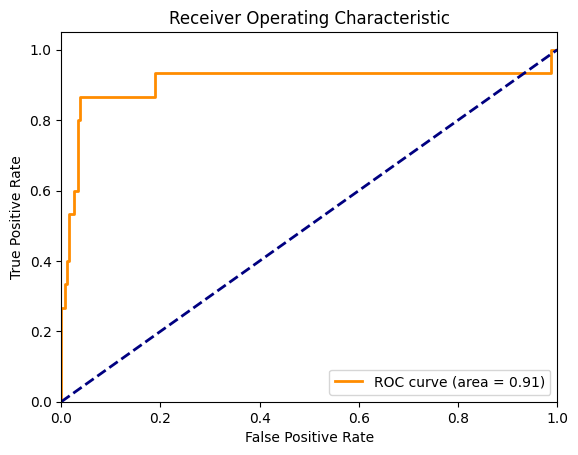

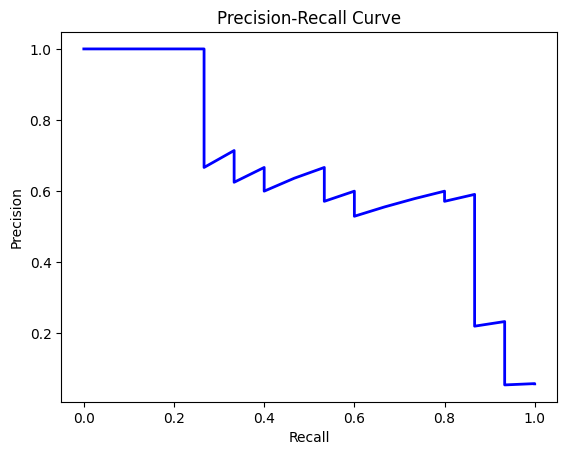

In [10]:
# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:\n")
print(confusion_matrix_df)

coefficients = pd.DataFrame(model.best_estimator_.coef_.flatten(), index=features, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Model Coefficients:\n")
print(coefficients)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()